# PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

*Generate samples from a 2D Gaussian*

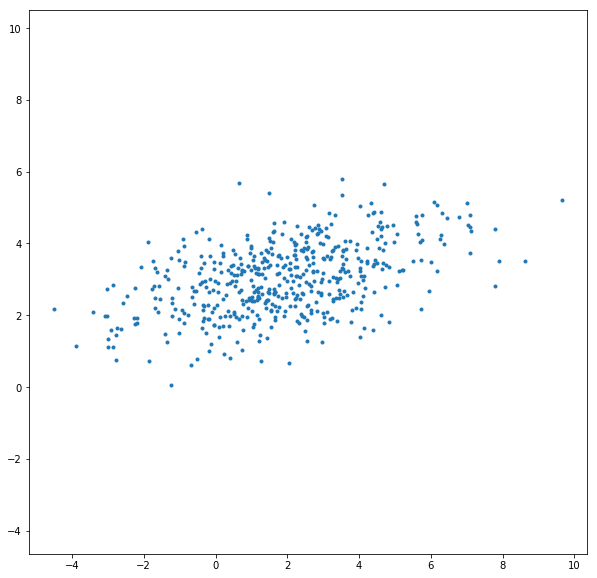

In [2]:
mean = [2, 3]
cov = [[5, 1], [1, 1]]
X = np.random.multivariate_normal(mean, cov, 500).T
#print 'X', X.shape
plt.figure(figsize=(10,10))
ax = plt.subplot(111)
ax.plot(X[0,:], X[1,:], '.')
ax.axis([-15,15,-15,15])
ax.axis('equal')
plt.show()

*Lets do PCA*

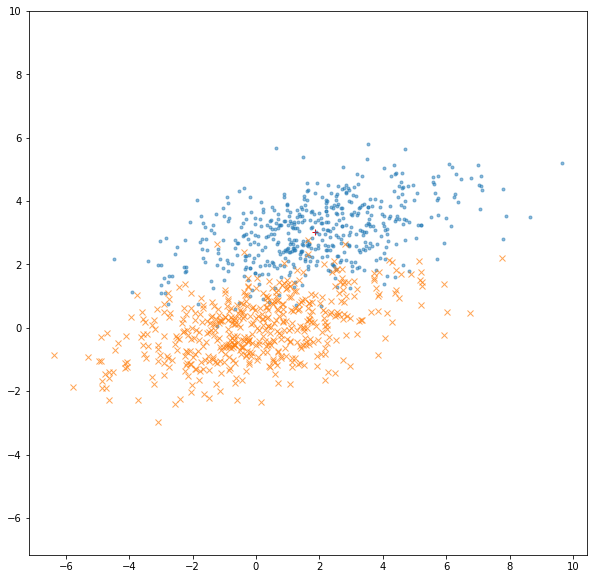

In [3]:
mean_X = np.mean(X,1)
Z = X - mean_X.reshape([2,1])

plt.figure(figsize=(10,10))
ax = plt.subplot(111)
ax.plot(mean_X[0], mean_X[1], '+r')
ax.plot(X[0,:], X[1,:], '.',alpha=0.5)
ax.plot(Z[0,:], Z[1,:], 'x',alpha=0.7)
ax.set_xlim([-15,15])
ax.set_ylim([-15,15])
ax.axis('equal')
plt.show()

*Principle components*

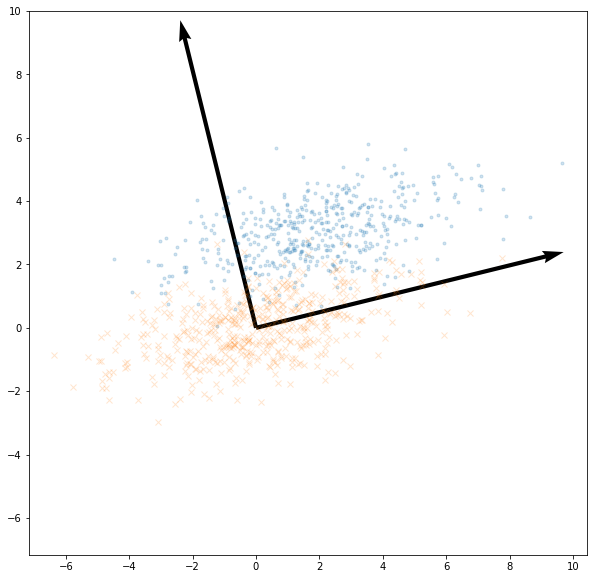

In [4]:
ZZt = np.dot(Z, Z.T)
e,v = np.linalg.eig(ZZt)
a = np.array([[0,0,v[0,0],v[1,0]],[0,0,v[0,1],v[1,1]]])
X1,Y1,U1,V1 = zip(*a)
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.plot(X[0,:], X[1,:], '.',alpha=0.2)
ax.plot(Z[0,:], Z[1,:], 'x',alpha=0.2)
ax.quiver(X1,Y1,U1,V1,angles='xy',scale_units='xy',scale=.1)
ax.set_xlim([-15,15])
ax.set_ylim([-15,15])
ax.axis('equal')
plt.draw()
plt.show()

*Dimensionality reduction* and *data reconstrution*

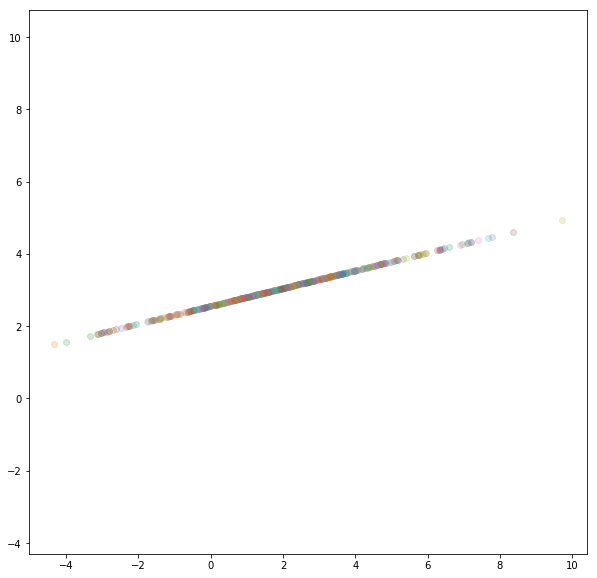

In [5]:
P = np.mat(v[:,0]).T
Z = np.mat(Z)
X_projected = P.T * Z
X_recon = P * X_projected + np.mat(mean_X).T

plt.figure(figsize=(10,10))
ax = plt.gca()
#ax.plot(X[0,:], X[1,:], '.',alpha=0.2)
#ax.plot(Z[0,:], Z[1,:], 'x',alpha=0.2)
ax.plot(X_recon[0,:], X_recon[1,:], 'o',alpha=0.2)
#ax.quiver(X1,Y1,U1,V1,angles='xy',scale_units='xy',scale=.1)
ax.set_xlim([-15,15])
ax.set_ylim([-15,15])
ax.axis('equal')
plt.draw()
plt.show()